## Observations and Insights 

In [1]:
#Observations
#1. Boxplot chart  shows no significant outliers across the top four drug regimens.
#2. 80% of the drug regimens have a slight right skewed distribution.
#3. Linear regression and correlation chart shows a strong correlation between weight and average tumor volume.  
    #As the weight increase so does the average tumor volume on mice.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_study_data = pd.merge(study_results, mouse_data, how = "left", on = "Mouse ID")

# Getting and dropping the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_data = complete_study_data.drop_duplicates(["Mouse ID", "Timepoint"])
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

# Calculate mean
mean_numpy = clean_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']

# Calculate median
median_numpy = clean_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']

# Calculate variance
var_numpy = clean_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']

# Calculate standard deviation
sd_numpy = clean_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']

# Calculate SEM 
tumor_error = clean_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_df = pd.DataFrame({"Mean": mean_numpy, "Median": median_numpy, "Variance": var_numpy, "Standard Deviation": sd_numpy, 
                          "SEM": tumor_error})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

# Group by drug regimen and mouse ID
grouped_data = pd.DataFrame(clean_data.groupby(["Drug Regimen"]).count()).reset_index()
regimen_datapoints = grouped_data[["Drug Regimen", "Mouse ID"]] 
regimen_datapoints = regimen_datapoints.rename(columns={"Mouse ID": "Mice Count"})
regimen_datapoints = regimen_datapoints.set_index("Drug Regimen")
regimen_datapoints

,Mice Count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


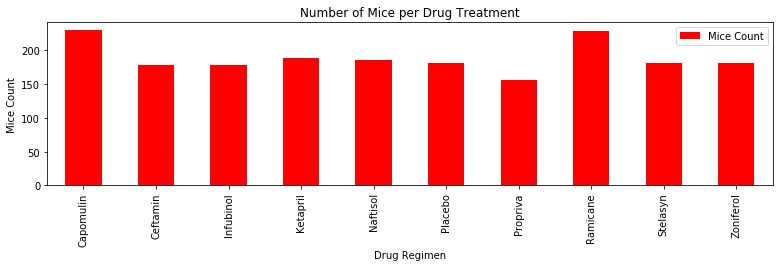

In [43]:
# Use DataFrame.plot() in order to create a bar chart of the data
regimen_datapoints.plot(kind="bar", figsize=(13,3), color = "r")

#Give the chart a title, x label, and y label
plt.title("Number of Mice per Drug Treatment")
plt.ylabel("Mice Count")
plt.xlabel("Drug Regimen")
plt.show()




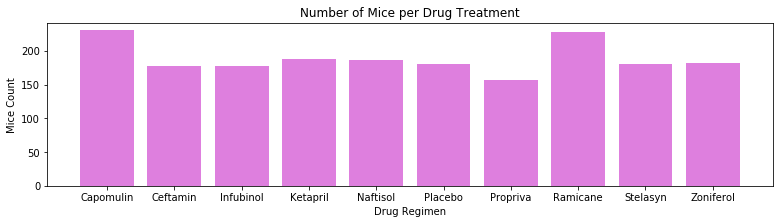

In [46]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
# Create drug regimen list
drug_regimens = summary_df.index.tolist()

# Create drug count list
drug_count = (clean_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()

x_axis = np.arange(len(drug_count))
x_axis = drug_regimens

# Create a bar chart based upon the above data
plt.figure(figsize=(13,3))
plt.bar(x_axis, drug_count, color='m',alpha=0.5,  align="center" )

# Give the chart a title, x label, and y label
plt.title("Number of Mice per Drug Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")

plt.show()


## Pie Plots

Text(0.5, 1.0, 'Distribution of Female versus Male Mice')

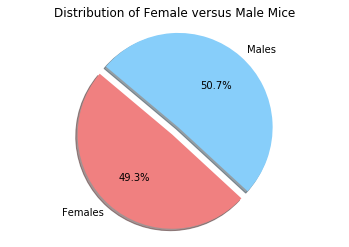

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Group by gender and get values of each section of the pie chart
sex_count = (clean_data.groupby(["Sex"])["Age_months"]).count().tolist()

# Labels for the sections of our pie chart
labels = ["Females", "Males"]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Sex" section from the Mice Count
explode = (0.1, 0)

# Creates the pie chart based upon the values above
plt.pie(sex_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.title("Distribution of Female versus Male Mice")

## Quartiles, Outliers and Boxplots

C:\Users\anagi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


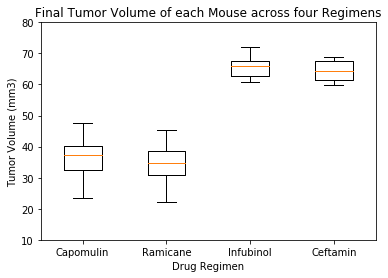

In [65]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Group by drug regime and get values of top 4 regimens.
top_regimen = clean_data[clean_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Sort values by timepoint
top_regimen.sorted = top_regimen.sort_values(["Timepoint"], ascending=True)

# Narrow data down to four columns
top_regimen_data = top_regimen[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

# Narrow data down to the last timepoint 
top_regimen_timepoint = top_regimen_data.loc[top_regimen_data["Timepoint"] == 45]

# Sort and clean data to use for box plot
sorted_clean_data_last = top_regimen_timepoint.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']

#Create a list to use as labels and dataframe
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = sorted_clean_data_last_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)

# Give the chart a title, x label, and y label
plt.title("Final Tumor Volume of each Mouse across four Regimens")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

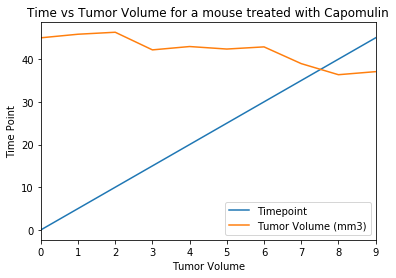

In [52]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Get data for a specific mouse ID
time_vs_tumor = clean_data[clean_data["Mouse ID"].isin(["g288"])]
time_vs_tumor

#Narrow data down 
time_vs_tumor_data = time_vs_tumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumor_data

# Reset the data index
line_plot_df = time_vs_tumor_data.reset_index()
line_plot_df

line_plot_df = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_df

#Create line plot based on values above
lines = line_plot_df.plot.line()

# Give the chart a title, x label, and y label
plt.xlabel("Tumor Volume")
plt.ylabel("Time Point")
plt.title("Time vs Tumor Volume for a mouse treated with Capomulin")

plt.show()


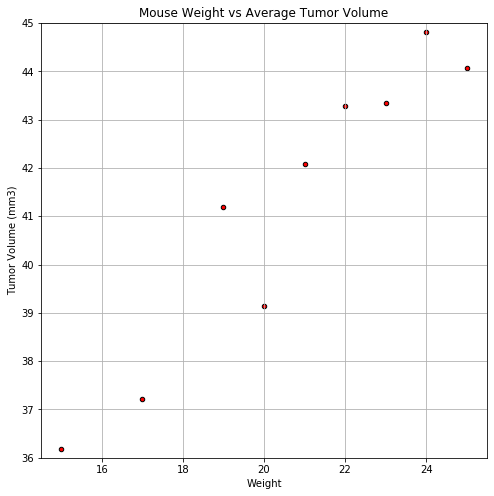

In [54]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Get data form Capomulin regimen
capomulin_plot_data = clean_data[clean_data["Drug Regimen"].isin(["Capomulin"])]

# Narrow data to mouse id, weight, and tumor volume
tumor_plot_data = top_regimen[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

# Group data by weight and average tumor volume
capomulin_grouped_weight = capomulin_plot_data.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()

# Create scatter plot with the values above
capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8), color="red", edgecolors="black")

# The y limits of our scatter plot is 36 to 45
plt.ylim(36, 45)


# Give the chart a title, x label, and y label
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume")

plt.show()

## Correlation and Regression

The correlation between both factors is 0.95


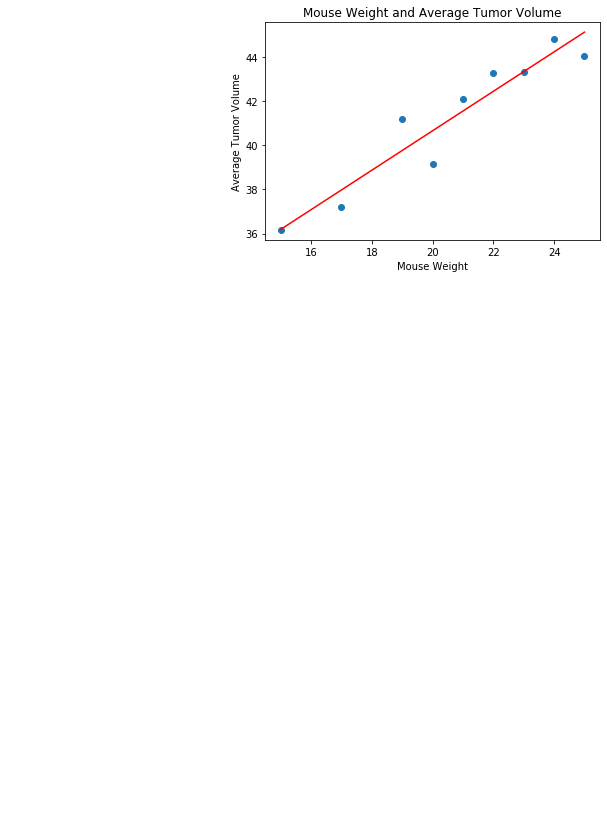

In [62]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Reset index
capomulin_scatter_plot = capomulin_plot_data.reset_index()
capomulin_scatter_plot

# Calculate average tumor volume per weight
coefficient_df = pd.DataFrame(capomulin_plot_data.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()).reset_index()
coefficient_df

# Get weight and tumor values and calculate the correlation between both factors.

weight = coefficient_df.iloc[:,0]
tumor = coefficient_df.iloc[:,1]
correlation = st.pearsonr(weight,tumor)

#plt.scatter(weight,tumor)
#plt.xlabel('Weight Per Mouse')
#plt.ylabel('Average Tumor size Per mouse')
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Add the linear regression equation and line to plot
x_values = coefficient_df['Weight (g)']
y_values = coefficient_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.title("Mouse Weight and Average Tumor Volume")
plt.show()